In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS.csv.gz", compression='gzip', header=None)

In [2]:
df.columns = [str(i) for i in range(df.shape[1])]
print("Class 0:", df["0"].value_counts())
X = df.drop(columns=["0"])  # Assuming the first column is the target variable
y = df.iloc[:, 0].astype(int)  # Assuming the first column is the target variable

_, X_sample, _, y_sample = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
print("Sampled class 0:", y_sample.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

Class 0: 0
1.0    5829123
0.0    5170877
Name: count, dtype: int64
Sampled class 0: 0
1    5299
0    4701
Name: count, dtype: int64


In [3]:
# from EnderClassifierModified import EnderClassifier
from EnderClassifierBoundedFast import EnderClassifier

print("ENDER CLASSIFIER BOUNDED")
ender = EnderClassifier(verbose=True, n_rules=25, use_gradient=False)
ender.fit(X_train, y_train, X_test=X_test, y_test=y_test)

ENDER CLASSIFIER BOUNDED
Default rule: [np.float64(-0.059598619506458776), np.float64(0.059598619506458776)]
####################################################################################
Rule: 1


ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

In [8]:
ender.evaluate_all_rules()

100%|██████████| 25/25 [00:00<00:00, 147.72it/s]


In [9]:
y_preds = ender.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
y_probs = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.665
ROC AUC: 0.7231919911682055
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       940
           1       0.69      0.67      0.68      1060

    accuracy                           0.67      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.67      0.67      0.67      2000

Confusion Matrix:
 [[618 322]
 [348 712]]


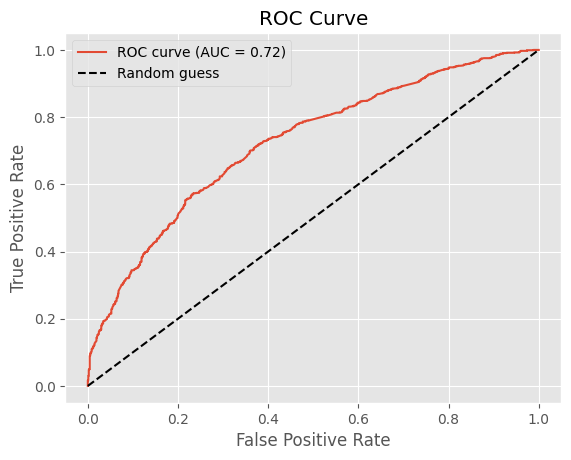

In [10]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from EnderClassifierModified import EnderClassifier

print("ENDER CLASSIFIER MODIFIED")
ender_modified = EnderClassifier(verbose=True, n_rules=10, use_gradient=False)
ender_modified.fit(X_train, y_train, X_test=X_test, y_test=y_test)

ENDER CLASSIFIER MODIFIED
Default rule: [np.float64(-0.059598619506458776), np.float64(0.059598619506458776)]
####################################################################################
Rule: 1
	26 in [0.6882845461368561, 0.9983678758144379]
	27 in [0.8240676522254944, 1.3679975271224976]
	28 in [-1e+308, 1.0254065990447998]
	22 in [-1e+308, 1.9807628989219666]
	14 in [0.3347342610359192, 1e+308]
	16 in [-1.737353503704071, 1.7187528610229492]
	15 in [-2.3783069849014282, 1e+308]
	1 in [0.2956512123346329, 2.650612115859985]
	5 in [-1.738534927368164, 1.7334222793579102]
	4 in [-1e+308, 1.9494531154632568]
	25 in [-1e+308, 1.7152031064033508]
	11 in [-2.8922048807144165, 2.228391408920288]
	3 in [-1e+308, 1.7412939667701721]
	23 in [-1e+308, 1.526170790195465]
	20 in [-1.7360318899154663, 1e+308]
=> vote for class 1 with weight 0.6266741013419722
[np.float64(-0.6266741013419722), np.float64(0.6266741013419722)]

#################################################################

In [35]:
y_preds = ender_modified.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
y_probs = ender_modified.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.6215
ROC AUC: 0.6779571457246086
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.36      0.48       940
           1       0.60      0.85      0.70      1060

    accuracy                           0.62      2000
   macro avg       0.64      0.61      0.59      2000
weighted avg       0.64      0.62      0.60      2000

Confusion Matrix:
 [[343 597]
 [160 900]]


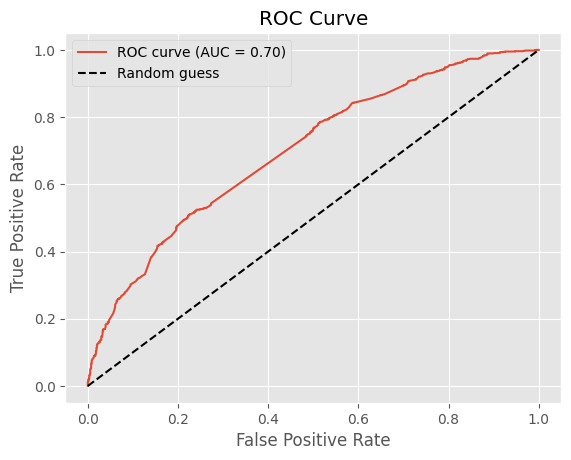

In [33]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_preds = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
# y_probs = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.6835
ROC AUC: 0.7483329987956644
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       940
           1       0.69      0.72      0.71      1060

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

Confusion Matrix:
 [[606 334]
 [299 761]]


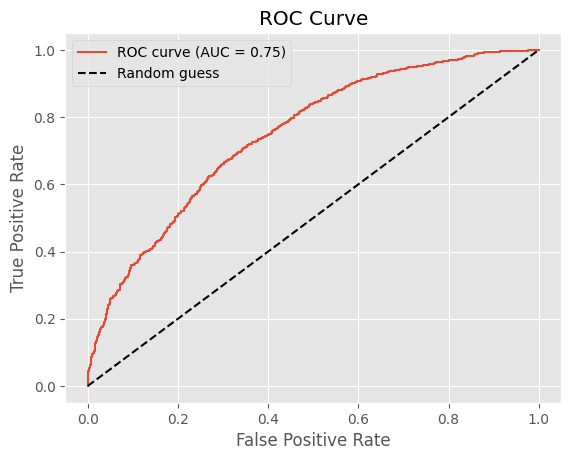

In [13]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()